In [2]:
#Multi-variate Regression 
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
#Load the carmpg database
df = pd.read_csv('E:/ML/AI ML docs/carMPG.csv')

In [4]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
0,8.0,8,307.0,130,3504,12.0,2015,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,2015,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,2015,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,2015,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,2015,1,ford torino


In [5]:
df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model_year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.489447,5.454774,193.425879,2970.424623,15.568090,2008.989950,1.572864
std,7.849757,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,8.000000,3.000000,68.000000,1613.000000,8.000000,2003.000000,1.000000
25%,17.125000,4.000000,104.250000,2223.750000,13.825000,2006.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,2009.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,2012.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,2015.000000,3.000000


In [6]:
df = pd.DataFrame(df, columns=['MPG', 'Acceleration'])

In [7]:
df.head()

,MPG,Acceleration
0,8.0,12.0
1,15.0,11.5
2,18.0,11.0
3,16.0,12.0
4,17.0,10.5


In [8]:
x=np.array(df.drop(['MPG'],1))

In [9]:
x

array([[12. ],
       [11.5],
       [11. ],
       [12. ],
       [10.5],
       [10. ],
       [ 9. ],
       [ 8.5],
       [10. ],
       [ 8.5],
       [10. ],
       [ 8. ],
       [ 9.5],
       [10. ],
       [15. ],
       [15.5],
       [15.5],
       [16. ],
       [14.5],
       [20.5],
       [17.5],
       [14.5],
       [17.5],
       [12.5],
       [15. ],
       [14. ],
       [15. ],
       [13.5],
       [18.5],
       [14.5],
       [15.5],
       [14. ],
       [19. ],
       [13. ],
       [15.5],
       [15.5],
       [15.5],
       [15.5],
       [12. ],
       [11.5],
       [13.5],
       [13. ],
       [11.5],
       [12. ],
       [12. ],
       [13.5],
       [19. ],
       [15. ],
       [14.5],
       [14. ],
       [14. ],
       [19.5],
       [14.5],
       [19. ],
       [18. ],
       [19. ],
       [20.5],
       [15.5],
       [17. ],
       [23.5],
       [19.5],
       [16.5],
       [12. ],
       [12. ],
       [13.5],
       [13. ],
       [11

In [10]:
y=np.array(df['MPG'])

In [11]:
y

array([ 8. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 25. ,
       19. , 16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. ,
       13. , 18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. ,
       27. , 26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. ,
       17. , 11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. ,
       22. , 21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. ,
       14. , 15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. ,
       18. , 18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. ,
       22. , 18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. ,
       15. , 24. , 20. , 11. , 20. , 21. , 19. , 15. , 31. , 26. , 32. ,
       25. , 16. , 16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. ,
       26. , 31. , 32. , 28. , 24. , 26. , 24. , 26

In [12]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
print(x_train.shape)

(318, 1)


In [14]:
print(y_train.shape)

(318,)


In [15]:
y_test

array([17.5, 14. , 32. , 18. , 32.9, 32. , 33.7, 44.3, 23. , 29. , 28.4,
       44. , 16.2, 27.2, 21.6, 27. , 21. , 25. , 17. , 26. , 14. , 29. ,
       27. , 31. , 13. , 18. , 16. , 14. , 28. , 18. , 13. , 30. , 36. ,
       19. , 30. , 38. , 24. , 38. , 37. , 15. , 30. , 26. , 15. , 20. ,
       28. , 36. , 43.4, 29.5, 36. , 34. , 25. , 10. , 26. , 37.7, 11. ,
       29. , 16. , 31.3, 17. , 20. , 20.5, 14. , 29. , 27. , 23.6, 16. ,
       24. , 25. , 19. , 14. , 13. , 34.2, 13. , 27. , 16.9, 25. , 18. ,
       15. , 24. , 19.2])

In [16]:
regmodel=linear_model.LinearRegression()
regmodel.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
regmodel.predict(30.0)

array([39.12707433])

In [18]:
regmodel.coef_

array([1.10185901])

In [19]:
regmodel.intercept_

6.071304163042321

In [20]:
regmodel.score(x_test, y_test)

0.22811229301176408

In [21]:
y_pred = regmodel.predict(x_test)

In [22]:
y_pred

array([20.39547123, 19.29361223, 18.85286863, 20.94640074, 22.37881744,
       23.37049055, 21.93807384, 29.98164458, 22.59918925, 21.49733024,
       23.70104825, 33.1770357 , 23.48067645, 23.37049055, 23.37049055,
       22.04825974, 22.59918925, 24.14179185, 18.74268273, 24.25197775,
       22.04825974, 27.55755477, 22.04825974, 27.44736887, 19.29361223,
       23.15011875, 18.30193912, 20.94640074, 24.14179185, 27.00662527,
       22.59918925, 20.28528533, 22.92974695, 23.15011875, 24.14179185,
       22.26863154, 24.80290726, 22.59918925, 22.59918925, 20.94640074,
       22.04825974, 25.57420856, 21.49733024, 27.00662527, 24.80290726,
       26.56588167, 32.18536259, 19.51398403, 22.04825974, 25.90476626,
       27.00662527, 21.49733024, 28.65941378, 25.13346496, 18.19175322,
       23.70104825, 19.29361223, 25.35383676, 23.15011875, 20.94640074,
       24.69272136, 23.15011875, 24.25197775, 25.90476626, 21.82788794,
       25.90476626, 20.94640074, 24.25197775, 20.94640074, 15.43

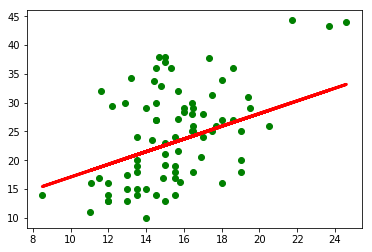

In [23]:
plt.scatter(x_test, y_test,  color='green')
plt.plot(x_test, y_pred, color='red', linewidth=3)
plt.show()

In [24]:
print(y_test)

[17.5 14.  32.  18.  32.9 32.  33.7 44.3 23.  29.  28.4 44.  16.2 27.2
 21.6 27.  21.  25.  17.  26.  14.  29.  27.  31.  13.  18.  16.  14.
 28.  18.  13.  30.  36.  19.  30.  38.  24.  38.  37.  15.  30.  26.
 15.  20.  28.  36.  43.4 29.5 36.  34.  25.  10.  26.  37.7 11.  29.
 16.  31.3 17.  20.  20.5 14.  29.  27.  23.6 16.  24.  25.  19.  14.
 13.  34.2 13.  27.  16.9 25.  18.  15.  24.  19.2]


In [25]:
print(x_test)

[[13. ]
 [12. ]
 [11.6]
 [13.5]
 [14.8]
 [15.7]
 [14.4]
 [21.7]
 [15. ]
 [14. ]
 [16. ]
 [24.6]
 [15.8]
 [15.7]
 [15.7]
 [14.5]
 [15. ]
 [16.4]
 [11.5]
 [16.5]
 [14.5]
 [19.5]
 [14.5]
 [19.4]
 [12. ]
 [15.5]
 [11.1]
 [13.5]
 [16.4]
 [19. ]
 [15. ]
 [12.9]
 [15.3]
 [15.5]
 [16.4]
 [14.7]
 [17. ]
 [15. ]
 [15. ]
 [13.5]
 [14.5]
 [17.7]
 [14. ]
 [19. ]
 [17. ]
 [18.6]
 [23.7]
 [12.2]
 [14.5]
 [18. ]
 [19. ]
 [14. ]
 [20.5]
 [17.3]
 [11. ]
 [16. ]
 [12. ]
 [17.5]
 [15.5]
 [13.5]
 [16.9]
 [15.5]
 [16.5]
 [18. ]
 [14.3]
 [18. ]
 [13.5]
 [16.5]
 [13.5]
 [ 8.5]
 [12. ]
 [13.2]
 [13. ]
 [18.6]
 [14.9]
 [17.5]
 [16.5]
 [13. ]
 [15.5]
 [15. ]]


In [29]:
#gradient function
A = np.array([y_test])

In [33]:
#np.gradient(A,2)
def residual_error(m,c,points):
    rss=0
    for i in range(0,len(points)):
        x = points[i,2]
        y = points[i,1]
        rss +=(y-(m*x+c))**2
        return rss/float(len(points))

In [ ]:
##

In [56]:
#gradient function
# The algorithm starts at x=13
cur_x = 13 
rate = 0.01 # Learning rate
#This tells us when to stop the algorithm
precision = 0.000001 
last_step = 1 #
# maximum number of iterations
max_iters = 6.071304163042321 
iters = 0 #iteration counter
#Gradient of function 
df = lambda x: 2*(13+2) 

In [57]:
while last_step > precision and iters < max_iters:
    prev_x = cur_x #Store current x value in prev_x
    cur_x = cur_x - rate * df(prev_x) #Grad descent
    last_step = abs(cur_x - prev_x) #Change in x
    iters = iters+1 #iteration count
    print("Iteration",iters,"\nX value is",cur_x) #Print iterations
    
print("The local minimum occurs at", cur_x)

Iteration 1 
X value is 12.7
Iteration 2 
X value is 12.399999999999999
Iteration 3 
X value is 12.099999999999998
Iteration 4 
X value is 11.799999999999997
Iteration 5 
X value is 11.499999999999996
Iteration 6 
X value is 11.199999999999996
Iteration 7 
X value is 10.899999999999995
The local minimum occurs at 10.899999999999995
